## Linear Algebra - PageRank Algorithm

In [4]:
from __future__ import division
from sklearn import datasets
from numpy.linalg import solve

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sea

import pandas as pd
import numpy as np



%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


---
In an numpy array, a **row vector** is defined as:

```python
a = np.array([[1, 2, 3]])
```
The shape of `a` is `(1, 3)`.

A **column vector** is defined as:
```python
b = np.array([[1], [2], [3]])
```
The shape of `b` is `(3, 1)`.

Check the `shape` of all the vectors. If the shape is missing a value, i.e. `(3,)` or  `(,3)`.

---

Markov Chain
---


**Stochastic matrix**

In mathematics, a stochastic matrix (also termed probability matrix, transition matrix,[1] substitution matrix, or Markov matrix) is a matrix used to describe the transitions of a Markov chain. Each of its entries is a nonnegative real number representing a probability. It has found use in probability theory, statistics, mathematical finance and linear algebra, as well as computer science and population genetics. There are several different definitions and types of stochastic matrices:

- A right stochastic matrix is a real square matrix, with each row summing to 1.

- A left stochastic matrix is a real square matrix, with each column summing to 1.

- A doubly stochastic matrix is a square matrix of nonnegative real numbers with each row and column summing to 1.

In the same vein, one may define stochastic vector (also called probability vector) as a vector whose elements are nonnegative real numbers which sum to 1. Thus, each row of a right stochastic matrix (or column of a left stochastic matrix) is a stochastic vector.

A common convention in English language mathematics literature is to use row vectors of probabilities and right stochastic matrices rather than column vectors of probabilities and left stochastic matrices; this article follows that convention.

A stochastic matrix describes a Markov chain $ \boldsymbol{X}_{t}$ over a finite state space S.

If the probability of moving from $i$ to $j$ in one time step is $Pr(j|i)=P_{i,j}$, the stochastic matrix $P$ is given by using $P_{i,j}$ as the $i^{th}$ row and $j^{th}$ column element, e.g.,

  $P=\left({\begin{matrix}P_{1,1}&P_{1,2}&\dots &P_{1,j}&\dots \\P_{2,1}&P_{2,2}&\dots &P_{2,j}&\dots \\\vdots &\vdots &\ddots &\vdots &\ddots \\P_{i,1}&P_{i,2}&\dots &P_{i,j}&\dots \\\vdots &\vdots &\ddots &\vdots &\ddots \end{matrix}}\right). $


Since the total of transition probability from a state $i$ to all other states must be 1, this matrix is a right stochastic matrix, so that

$\sum_j P_{i,j}=1$

The product of two right stochastic matrices is also right stochastic. In particular, the $k-th$ power $P^{k}$ of a right stochastic matrix $P$ is also right stochastic. The probability of transitioning from $i$ to $j$ in two steps is then given by the $(i,j)^{th}$ element of the square of $P$:

$\left(P ^{2}\right)_{i,j}$

In general the probability transition of going from any state to another state in a finite Markov chain given by the matrix $P$ in $k$ steps is given by $P^k$.

An initial distribution is given as a **row vector**.

A stationary probability vector ${\pi }$ is defined as a distribution, written as a row vector, that does not change under application of the transition matrix; that is, it is defined as a probability distribution on the set $\{1,...,n\}$ which is also a row eigenvector of the probability matrix, associated with eigenvalue 1:

$\boldsymbol{\pi}P=\boldsymbol{\pi}$

The right spectral radius of every right stochastic matrix is clearly at most 1. Additionally, every right stochastic matrix has an obvious column eigenvector associated to the eigenvalue 1: The vector ${\boldsymbol {1}}$, whose coordinates are all equal to 1. As left and right eigenvalues of a square matrix are the same, every stochastic matrix has, at least, a row eigenvector associated to the eigenvalue 1 and the largest absolute value of all its eigenvalues is also 1. Finally, the Brouwer Fixed Point Theorem (applied to the compact convex set of all probability distributions of the finite set $\{1,...,n\}$ implies that there is some left eigenvector which is also a stationary probability vector.

**Markov chain**

Markov chains have many applications as statistical models of real-world processes.

The changes of state of the system are called transitions. The probabilities associated with various state changes are called transition probabilities. The process is characterized by a state space, a transition matrix describing the probabilities of particular transitions, and an initial state (or initial distribution) across the state space. By convention, we assume all possible states and transitions have been included in the definition of the process, so there is always a next state, and the process does not terminate.





---
Case: Car ansurance

Evaluating: Customer probability for liability

**Initial population distribution (Initial state vector): probabilities add up to 1**

From:

High Risk = 0.10

Low Risk = 0.90


**Transition matrix: probabilities add up to 1**

To:

High Risk = 0.60

High Risk = 0.15

Low Risk = 0.40

Low Risk = 0.85




In [5]:
# Initial state vector
inistate = np.matrix([[0.10, 0.90]])
inistate

matrix([[ 0.1,  0.9]])

In [6]:
# Transition matrix
P = np.matrix([[0.60, 0.40], [0.15, 0.85]])
P

matrix([[ 0.6 ,  0.4 ],
        [ 0.15,  0.85]])

In [7]:
# Obtaining one step probability : Customer liability one year from now

risk = inistate.dot(P)
risk

matrix([[ 0.195,  0.805]])

In [8]:
# Obtaining two step probability : Customer liability two year from now

risk_2 = risk.dot(P)
risk_2

matrix([[ 0.23775,  0.76225]])

**Obtaining N step probability : Customer liability N year from now**

Initial state vector * transition matrix^N = N year from now vector





In [9]:
# Obtaining 25 step probability : Customer liability 25 year from now

risk_25 = inistate.dot(P**25)
risk_25


matrix([[ 0.27272727,  0.72727273]])

**Conditional probability**

Case: Customer enter the system as High Risk.

What is the probability of High and Low risk in two years?
                        
Initial state vector = [ high: 1 , low: 0 ]


In [10]:
Hrisk = np.matrix([[1, 0]])

In [11]:
cust_prob_2 = Hrisk.dot(P**2)
cust_prob_2

matrix([[ 0.42,  0.58]])

**Markov chain**

**VP = V**

Obtain the Initial state vector for a long term stability

Having 

V = np.matrix([[X, y]])

P = transition matrix

VP = P

VP - V = 0

V(P - 1) = 0

**Where, I : identity matrix = 1 **

V*I = V

**Then:**

X + y = 1

V(P - I) = 0

**Solving Ax = b**


$\begin{pmatrix} a_{11} & \cdots & a_{1p} \\
 a_{21} & \cdots & a_{2p} \\
 \vdots & \ddots & \vdots \\
 a_{n1} & \cdots & a_{np}
 \end{pmatrix}. \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}\quad =  \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix} \quad$


x = Ainvert*b.T 

---

The simplest set of linear equations to solve occur when you have both n equations and n unknowns. In this case the matrix will be square and can often be inverted. Consider this simple example: 

  
x + y = 1 ...from probability 

.4x -.15y = 0  ...from V(P - I) = 0

A: [[1, 1], [0.4, -0.15]]

b: [[1,0]]

Ainv : A.I

b : b.T

Obtaining V vector: 

V = Ainv*b

Check: A*ans


In [19]:
A = np.matrix([[1, 1], [0.4, -0.15]])
b = np.matrix([[1,0]])

In [23]:
Ainv = A.I
Ainv

matrix([[ 0.27272727,  1.81818182],
        [ 0.72727273, -1.81818182]])

In [25]:
b = b.T

In [26]:
b

matrix([[1],
        [0]])

In [27]:
v = Ainv*b
v

matrix([[ 0.27272727],
        [ 0.72727273]])

In [28]:
A*v # : b

matrix([[ 1.],
        [ 0.]])

In [31]:
I = A.dot(Ainv)
I

matrix([[ 1.,  0.],
        [ 0.,  1.]])

---
**Ax = b : numpy.linalg **

from numpy.linalg import solve


In [36]:
x = solve(A, b)
x

matrix([[ 0.27272727],
        [ 0.72727273]])

---
Iris data-set
---

In [18]:
df = datasets.load_iris()

In [19]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
sl_sw = datasets.load_iris().data[:, :2]

In [21]:
sl_sw.shape

(150, 2)

In [22]:
sl_sw.mean(axis=0)

array([ 5.84333333,  3.054     ])

In [23]:
sl_sw.mean(axis=0).shape

(2,)

a np.matrix can be reshaped into a vector using reshape function with parameter -1

(-1, number_of_columns) --> vector

In [24]:
sl_sw.mean(axis=0).reshape(-1,1) 

array([[ 5.84333333],
       [ 3.054     ]])

In [25]:
# center_mass :  mean vector
v = sl_sw.mean(axis=0).reshape(-1,1)
v

array([[ 5.84333333],
       [ 3.054     ]])

In [26]:
v.shape

(2, 1)

In [27]:
v.reshape((-1,2))

array([[ 5.84333333,  3.054     ]])

In [28]:
v[0]

array([ 5.84333333])

In [29]:
v[1]

array([ 3.054])

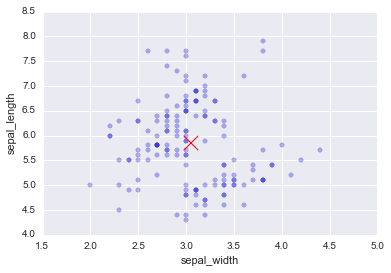

In [30]:
plt.scatter(sl_sw[:,1], sl_sw[:,0], alpha=0.3)
plt.scatter(v[1],v[0], c='r', marker='x', s=200, linewidth=1) #center_mass
plt.ylabel('sepal_length')
plt.xlabel('sepal_width');

In [100]:

v1 = np.array([1,1]).reshape(2,1)
v2 = np.array([2,2]).reshape(2,1)
v3 = np.array([2,2]).reshape(1,2)
u=np.array([[1], [2], [3]])
w=np.array([[3], [5], [7]])

**euclidean_distance**

np.linalg.norm(a- b)

$  d(a, b) = \sqrt{(b_1-a_1)^2 + (b_2-a_2)^2 + \cdots + (b_n-a_n)^2} = \sqrt{\sum_{i=1}^n (q_i-p_i)^2} $

In [103]:
def euclidean_dist(v1, v2):
    if v1.shape == v2.shape and v1.shape[1] == 1:
        return np.linalg.norm(v1 - v2)
    else:
        print 'v1 shape:{} is not equal v2 shape:{}'.format(v1.shape, v2.shape)

euclidean_dist(u, w)

5.3851648071345037

In [104]:
np.linalg.norm(u - w)

5.3851648071345037

**Cosine similarity** is a measure of similarity between two vectors of an inner product space that measures the cosine of the angle between them

$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$


correlation coefficient -->  similarity -- >   cos(θ ) = x⋅y / || x || || y || 

-->  np.dot(x,y) / (np.linalg.norm(x)*np.linalg.norm(y))


In [131]:
def cosine_simi(v1, v2):
    if (v1.shape != v2.shape and v1[1] != 1):
        raise ValueError('Invalid shape')
    return np.array(np.dot(v1.T, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

cosine_simi(u, w)

array([[ 0.9974149]])

In [117]:
c_s = ((np.sum(u*w))/(np.sqrt(np.sum(u**2.))*np.sqrt(np.sum(w**2.))))
c_s

0.99741490304305769

In [ ]:
# def center_mass(array):
#     return array.mean(axis=0).reshape(-1,1)

distance_metric(array, func):
    returns the distance metric between each of the data point and the mean vector "Center mass"
    
In mathematics, a metric or distance function is a function that defines a distance between each pair of elements of a set. A set with a metric is called a metric space

$d(x,y) \ge 0 $  	non-negativity or separation axiom

$d(x,y) = 0 \Leftrightarrow x = y$ identity of indiscernibles

$d(x,y)  = d(y,x)$  	symmetry

$d(x,z) \le d(x,y) + d(y, z)$  	subadditivity or triangle inequality

In [55]:
def distance_metric(array, func):
    center_mass = array.mean(axis=0).reshape(-1,1)# mean vector
    return np.array([func(v.reshape(-1,1), center_mass) for v in array]).reshape(-1,1)
    
    

In [56]:
euclidean_distance = distance_metric(sl_sw, euclidean_dist) # distances
euclidean_distance[:4]

array([[ 0.86686818],
       [ 0.94487765],
       [ 1.1526175 ],
       [ 1.24418398]])

In [135]:
cosine_similarity = distance_metric(sl_sw, cosine_simi) # similarities
#cosine_similarity

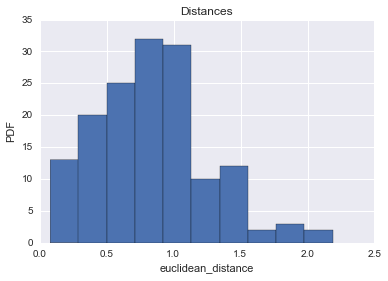

In [119]:
plt.hist(euclidean_distance)
plt.title('Distances')
plt.xlabel('euclidean_distance')
plt.ylabel('PDF');

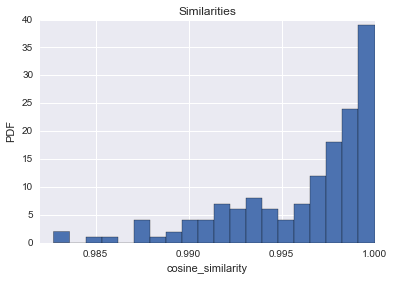

In [120]:
plt.hist(cosine_similarity, bins= 20)
plt.title('Similarities')
plt.xlabel('cosine_similarity')
plt.ylabel('PDF');
plt.show()

### Implementing the PageRank Algorithm

The [Page Rank Algorithm](http://en.wikipedia.org/wiki/PageRank) is used by Google
Search (in their beginnings) to rank websites in their search engine in terms 
of the importance of webpages. 
[More about PageRank](http://books.google.com/books/p/princeton?id=5o_K4rri1CsC&printsec=frontcover&source=gbs_ViewAPI&hl=en#v=onepage&q&f=false)

I will implement PageRank on this simple network of websites.

These web pages correspond to the states our Markov chain can be in
   - Assume that the model of our chain is that of a random surfer/walker.
   
---
We randomly pick an outgoing edge from our current state. Before we can do any sort of calculation we need to know how we will move on this Markov Chain.

We are presented with 5 nodes "Pages": A, B, C, D, E

Where:

1 = Input

0 = Output

In [5]:
nodes = ['A', 'B', 'C', 'D', 'E']

zd = 0 # zero_diagonal for every node, each row is a node

markov_transition = np.matrix([
        [zd, 1, 1, 1, 0],
        [1, zd, 1, 0, 1],
        [0, 1, zd, 0, 1],
        [0, 0, 0, zd, 1],
        [0, 0, 1, 0, zd]
        
    ])





**Stationary distribution relation to eigenvectors and simplices**

A stationary distribution π is a (row) vector, whose entries are non-negative and sum to 1, is unchanged by the operation of transition matrix P on it and so is defined by

$ \pi\mathbf{P} =  \pi.\ $

By comparing this definition with that of an eigenvector we see that the two concepts are related and that

$ \pi=\frac{e}{\sum_i{e_i}} $

where:

is a normalized  ($ \textstyle \sum_i \pi_i=1 $) multiple of a left eigenvector **e** of the transition matrix P<sup>T</sup> with an eigenvalue of 1.

---

If there is more than one unit eigenvector then a weighted sum of the corresponding stationary states is also a stationary state. But for a Markov chain one is usually more interested in a stationary state that is the limit of the sequence distributions for some initial distribution.



The values of stationary distribution \textstyle \pi_i are associated with the state space of P and its eigenvectors have their relative proportions preserved. Since the components of π are positive and the constraint that their sum is unity can be rewritten as

$ \textstyle \sum_i 1 \cdot \pi_i=1 $

we see that the dot product of π with a vector whose components are all 1 is unity and that π lies on a simplex(https://en.wikipedia.org/wiki/Simplex#The_standard_simplex).


In [7]:
# Initial state, equal probability to be at each page, axis=0 --> across column
state = markov_transition / markov_transition.sum(axis=0).astype(float)
state

matrix([[ 0.        ,  0.5       ,  0.33333333,  1.        ,  0.        ],
        [ 1.        ,  0.        ,  0.33333333,  0.        ,  0.33333333],
        [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.33333333],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.33333333],
        [ 0.        ,  0.        ,  0.33333333,  0.        ,  0.        ]])

In [13]:
# user = surfer, equal probabilities
user = (np.ones(len(nodes)) / float(len(nodes)))
user

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [33]:
surfer = user.reshape(-1,1) # to reshape it to a vector form
surfer

array([[ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2]])

Taking one step and getting the probability to be at each state

In [18]:
state.dot(markov_transition)

matrix([[ 0.5       ,  0.33333333,  0.5       ,  0.        ,  1.83333333],
        [ 0.        ,  1.33333333,  1.33333333,  1.        ,  0.33333333],
        [ 0.5       ,  0.        ,  0.83333333,  0.        ,  0.5       ],
        [ 0.        ,  0.        ,  0.33333333,  0.        ,  0.        ],
        [ 0.        ,  0.33333333,  0.        ,  0.        ,  0.33333333]])

---
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'). 

You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus

```
fig, ax = plt.subplots()
```
is more concise than this:

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

Plotting the probability of each step page for first 10 steps

---


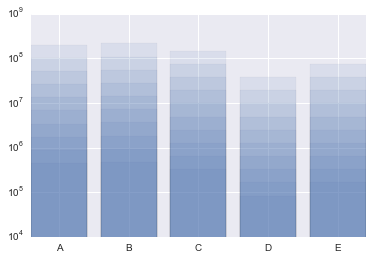

In [48]:
fig, ax = plt.subplots()

for i in xrange(10):
    surfer = markov_transition.dot(surfer)
    plt.bar(range(len(nodes)), surfer, alpha=.1, 
            align='center')
    plt.xticks(range(len(nodes)), ('A', 'B', 'C', 'D', 'E'))
    
ax.set_yscale('log')

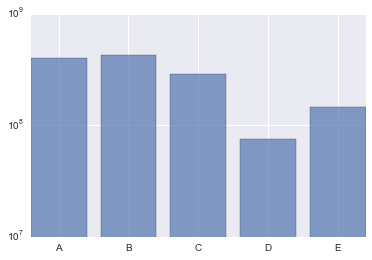

In [69]:
fig, ax = plt.subplots()

for i in xrange(10):
    surfer_state = markov_transition.dot(surfer)
    plt.bar(range(len(nodes)), surfer_state, alpha=.1, 
            align='center')
    plt.xticks(range(len(nodes)), ('A', 'B', 'C', 'D', 'E'))
ax.set_yscale('log')

Using the function for calculating **eigenvectors** compute the **stationary distribution (page rank)**

In [51]:
eigenvalue, eigenvector = numpy.linalg.eig(markov_transition)

In [52]:
eigenvalue

array([ 1.97169640+0.j        , -1.23620598+0.56872839j,
       -1.23620598-0.56872839j,  0.25035778+0.45959287j,
        0.25035778-0.45959287j])

In [53]:
eigenvector

matrix([[-0.59548316+0.j        ,  0.54334377+0.j        ,
          0.54334377-0.j        , -0.00963945+0.60123178j,
         -0.00963945-0.60123178j],
        [-0.63176654+0.j        , -0.39506308-0.32698979j,
         -0.39506308+0.32698979j,  0.23929213+0.28610188j,
          0.23929213-0.28610188j],
        [-0.43138161+0.j        , -0.05665133+0.48782604j,
         -0.05665133-0.48782604j,  0.09037628-0.14000905j,
          0.09037628+0.14000905j],
        [-0.11096386+0.j        , -0.21997041+0.14817877j,
         -0.21997041-0.14817877j, -0.60840356+0.j        , -0.60840356-0.j        ],
        [-0.21878704+0.j        ,  0.18765527-0.3082829j ,
          0.18765527+0.3082829j , -0.15231856-0.27961794j,
         -0.15231856+0.27961794j]])

The stationary state is represented by the real form of the left (first) eigenvector


In [71]:
eigenvector[:,0]

matrix([[-0.59548316+0.j],
        [-0.63176654+0.j],
        [-0.43138161+0.j],
        [-0.11096386+0.j],
        [-0.21878704+0.j]])

In [72]:
np.real(eigenvector[:,0])

matrix([[-0.59548316],
        [-0.63176654],
        [-0.43138161],
        [-0.11096386],
        [-0.21878704]])

In [73]:
np.real(eigenvector[:,0]*-1)

matrix([[ 0.59548316],
        [ 0.63176654],
        [ 0.43138161],
        [ 0.11096386],
        [ 0.21878704]])

In [74]:
ev = np.real(eigenvector[:,0]*-1)

In [58]:
eigenvector_real = np.real(eigenvector[:,0]*-1)
eigenvector_real

matrix([[ 0.59548316],
        [ 0.63176654],
        [ 0.43138161],
        [ 0.11096386],
        [ 0.21878704]])

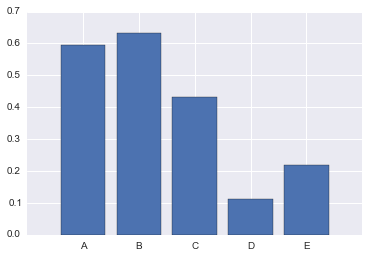

In [68]:
plt.bar(range(len(nodes)), eigenvector_real, align='center')
plt.xticks(range(len(nodes)), ('A', 'B', 'C', 'D', 'E'));


The left eigenvector obtained from numpy.linalg.eig has to be normalized

In [75]:
norm_ev = ev / ev.sum(axis=0).astype(float)
norm_ev

matrix([[ 0.29948124],
        [ 0.31772892],
        [ 0.21695105],
        [ 0.0558061 ],
        [ 0.11003269]])

In [78]:
norm_ev.sum()

1.0

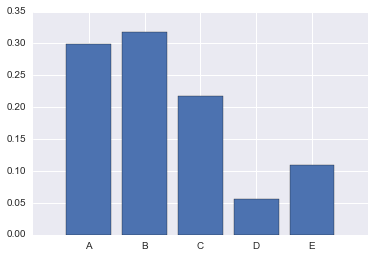

In [77]:
plt.bar(range(len(nodes)), norm_ev, align='center')
plt.xticks(range(len(nodes)), ('A', 'B', 'C', 'D', 'E'));